In [ ]:
# Practical 6: Implement Transfer Learning on the suitable public dataset (e.g. classify the cats versus dogs dataset from Kaggle or UCI or inbuilt dataset)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

In [2]:
# Download and extract dataset
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
filename = os.path.join(os.getcwd(), "cats_and_dogs_filtered.zip")
tf.keras.utils.get_file(filename, url)
with zipfile.ZipFile("cats_and_dogs_filtered.zip", "r") as zip_ref:
    zip_ref.extractall()

In [3]:
# Define data generators
train_dir = os.path.join(os.getcwd(), "cats_and_dogs_filtered", "train")
validation_dir = os.path.join(os.getcwd(), "cats_and_dogs_filtered","validation")
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,
shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode="binary")
validation_generator = validation_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
# Load pre-trained VGG16 model
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(150, 150, 3))

# Freeze convolutional base layers
conv_base.trainable = False

In [5]:
# Build model on top of the convolutional base
model = tf.keras.models.Sequential()
model.add(conv_base)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [6]:
# Compile model
model.compile(loss="binary_crossentropy",
optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5),metrics=["accuracy"])

In [7]:
# Train model
history = model.fit(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Epoch 1/30
100/100 [==============================] - 304s 3s/step - loss: 0.6893 - accuracy: 0.5910 - val_loss: 0.4807 - val_accuracy: 0.8150
Epoch 2/30
100/100 [==============================] - 260s 3s/step - loss: 0.5445 - accuracy: 0.7175 - val_loss: 0.4082 - val_accuracy: 0.8410
Epoch 3/30
100/100 [==============================] - 607s 6s/step - loss: 0.4776 - accuracy: 0.7770 - val_loss: 0.3689 - val_accuracy: 0.8530
Epoch 4/30
100/100 [==============================] - 279s 3s/step - loss: 0.4461 - accuracy: 0.7995 - val_loss: 0.3448 - val_accuracy: 0.8560
Epoch 5/30
100/100 [==============================] - 285s 3s/step - loss: 0.4247 - accuracy: 0.7980 - val_loss: 0.3334 - val_accuracy: 0.8560
Epoch 6/30
100/100 [==============================] - 283s 3s/step - loss: 0.4020 - accuracy: 0.8210 - val_loss: 0.3134 - val_accuracy: 0.8640
Epoch 7/30
100/100 [==============================] - 285s 3s/step - loss: 0.4014 - accuracy: 0.8150 - val_loss: 0.3034 - val_accuracy: 0.8690

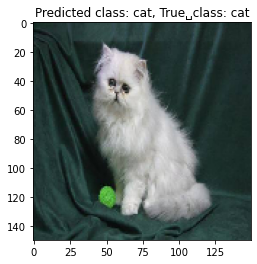

In [8]:
# Show sample input and its predicted class
x, y_true = next(validation_generator)
y_pred = model.predict(x)
class_names = ['cat', 'dog']
for i in range(len(x)):
    plt.imshow(x[i])
plt.title(f'Predicted class: {class_names[int(round(y_pred[i][0]))]}, True␣class: {class_names[int(y_true[i])]}')
plt.show()

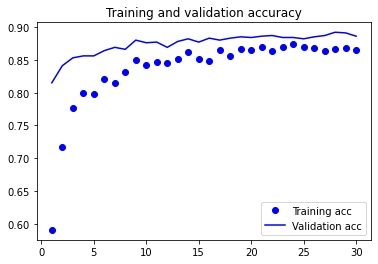

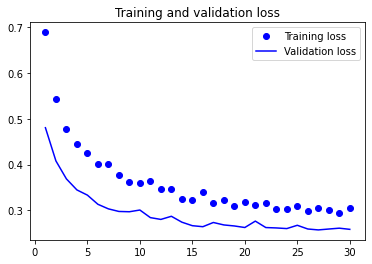

In [9]:
# Plot accuracy and loss over time
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()